In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [84]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [85]:
df=df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


<Figure size 1000x600 with 0 Axes>

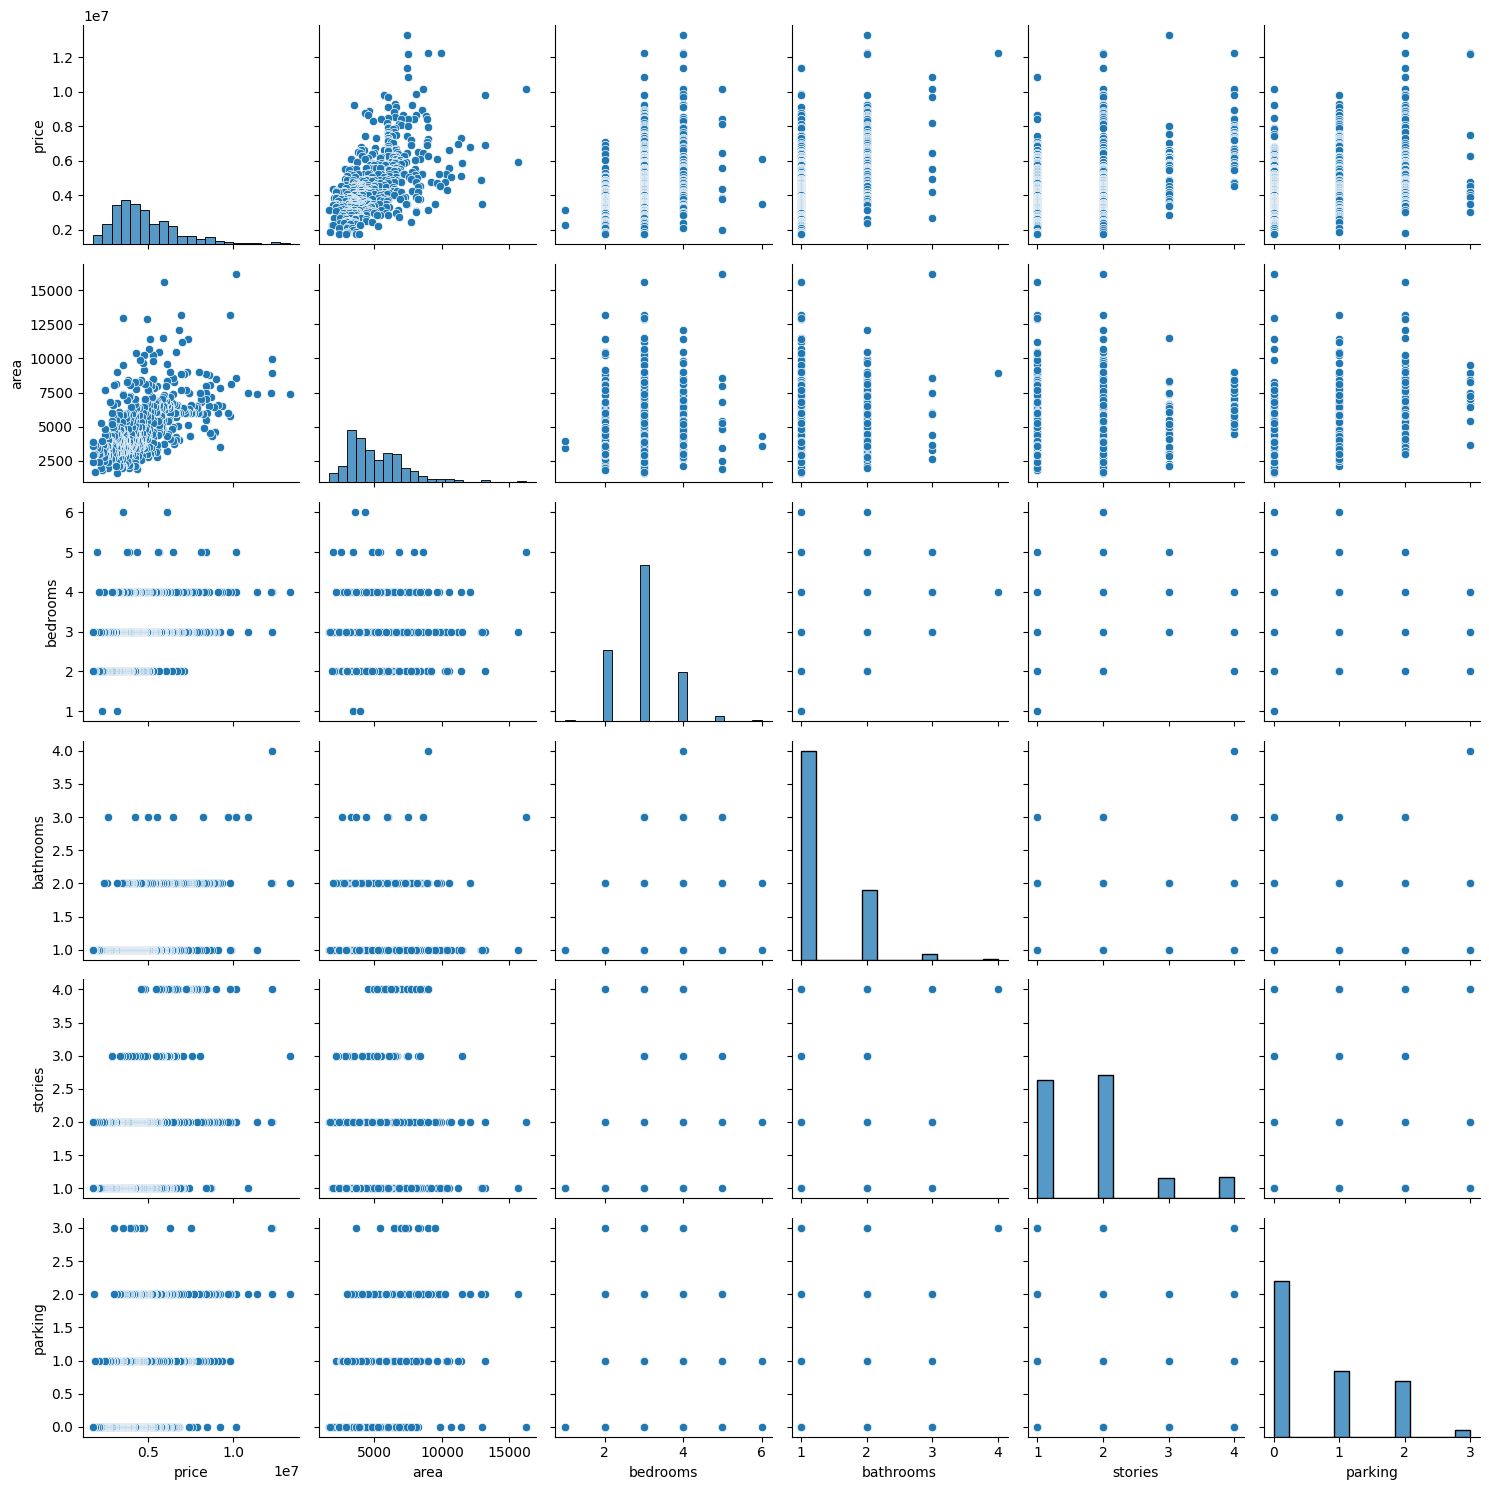

In [86]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.tight_layout()

In [87]:
# Prepare Target (y) and Features (X_raw)
y = df.iloc[:, 0].to_numpy().reshape(-1, 1)
X_raw = df.iloc[:, 1:].to_numpy()

In [88]:
# Train-Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=56)

# Add Bias Term (training)
ones_train = np.ones((X_train_raw.shape[0], 1))
X_train = np.hstack([ones_train, X_train_raw])

# Add Bias Term (testing)
ones_test = np.ones((X_test_raw.shape[0], 1))
X_test = np.hstack([ones_test, X_test_raw])

In [89]:
# Apply OLS eqn
# beta = (X_train^T * X_train)^-1 * X_train^T * y_train
XT_train = X_train.T
beta = np.linalg.inv(XT_train @ X_train) @ (XT_train @ y_train)

In [90]:
# Get Predictions on the Test Set
y_test_pred = X_test @ beta

# Calculate Errors on Test Set
residuals = y_test - y_test_pred
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))

# Calculate R-squared for Test Set
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"--- Test Set Performance ---")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

--- Test Set Performance ---
Mean Absolute Error (MAE): 955,916.70
Root Mean Squared Error (RMSE): 1,314,423.87
R-squared Score: 0.5743
